In [9]:
# imports
import json
import time

import numpy as np
from market import Market
from utility import (
    createFolder, 
    save_object, 
    produce_name_datetime,
)
import gen_vary_single_param as gvsp
import plot_results as pr
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import probplot

color1 = '#2A9D8F'
color2 = '#F4A261'

In [10]:
# Read the parameters from the json file
with open('constants/base_params.json') as f:
    params = json.load(f)

In [11]:
# Define the property to vary, in this case the seed
property_varied = "set_seed"

# Define the range of the property to vary
property_list = list(range(11,41))

#Generate the list of parameters to simulate
params_list = gvsp.gen_param_list(params, property_list, property_varied)

#Choose whether to print the simulation
print_simu = True

#Generate the data
Data_list = [gvsp.generate_data(i, print_simu=print_simu) for i in params_list]

SIMULATION time taken: 0.01126613219579061 minutes or 0.6759741306304932 s
SIMULATION time taken: 0.003658600648244222 minutes or 0.21952104568481445 s
SIMULATION time taken: 0.0036777655283610025 minutes or 0.2206709384918213 s
SIMULATION time taken: 0.0036686182022094725 minutes or 0.2201218605041504 s
SIMULATION time taken: 0.0037385702133178713 minutes or 0.2243180274963379 s
SIMULATION time taken: 0.003621550401051839 minutes or 0.21729683876037598 s
SIMULATION time taken: 0.003629585107167562 minutes or 0.21777892112731934 s
SIMULATION time taken: 0.003696850935618083 minutes or 0.2218151092529297 s
SIMULATION time taken: 0.0037299315134684246 minutes or 0.2238011360168457 s
SIMULATION time taken: 0.0037245631217956545 minutes or 0.22347807884216309 s
SIMULATION time taken: 0.0038018981615702313 minutes or 0.228118896484375 s
SIMULATION time taken: 0.0036624670028686523 minutes or 0.21975398063659668 s
SIMULATION time taken: 0.003685601552327474 minutes or 0.22113990783691406 s
S

In [12]:
np.std(Data_list[1].history_theta_t)

0.5955373021823627

In [13]:
#compute average theta over the different seeds
theta = [mkt.history_theta_t for mkt in Data_list]
#compute the standard deviation of theta over the different seeds
std_theta = [np.std(mkt.history_theta_t, axis=0) for mkt in Data_list]
print(std_theta)
print(np.std(theta[0]))
t0 = [mkt.history_theta_t for mkt in Data_list]
print(np.std(t0))
len(t0)

[0.5896232756064912, 0.5955373021823627, 0.5835668652713836, 0.5521701106545046, 0.5666656721753803, 0.565325418140137, 0.5500046199837301, 0.5904126899872544, 0.5544554297149378, 0.5776622593444095, 0.5697843501811968, 0.5830598159263931, 0.5712679115093401, 0.5717819534073327, 0.6045561060719425, 0.5489449633582454, 0.5655643584090917, 0.5920696121949047, 0.5887884571089491, 0.5589469475270686, 0.5537409681840475, 0.5407346693138725, 0.6126405443107518, 0.5944177783664322, 0.5730677520070153, 0.5836634357080255, 0.5920531104084525, 0.5715340471398612, 0.53420554619894, 0.6093432753575478]
0.5896232756064912
0.57646429622368


30

avg_price is:  109.97897855513857 RA_price is:  109.98424042396022
avg_std is:  1.3848592830756394 RA_ is:  1.2431016463275308
avg_autocorr is:  0.5603337854672502 RA is:  0.5
kurtosis is:  2.49461290688537


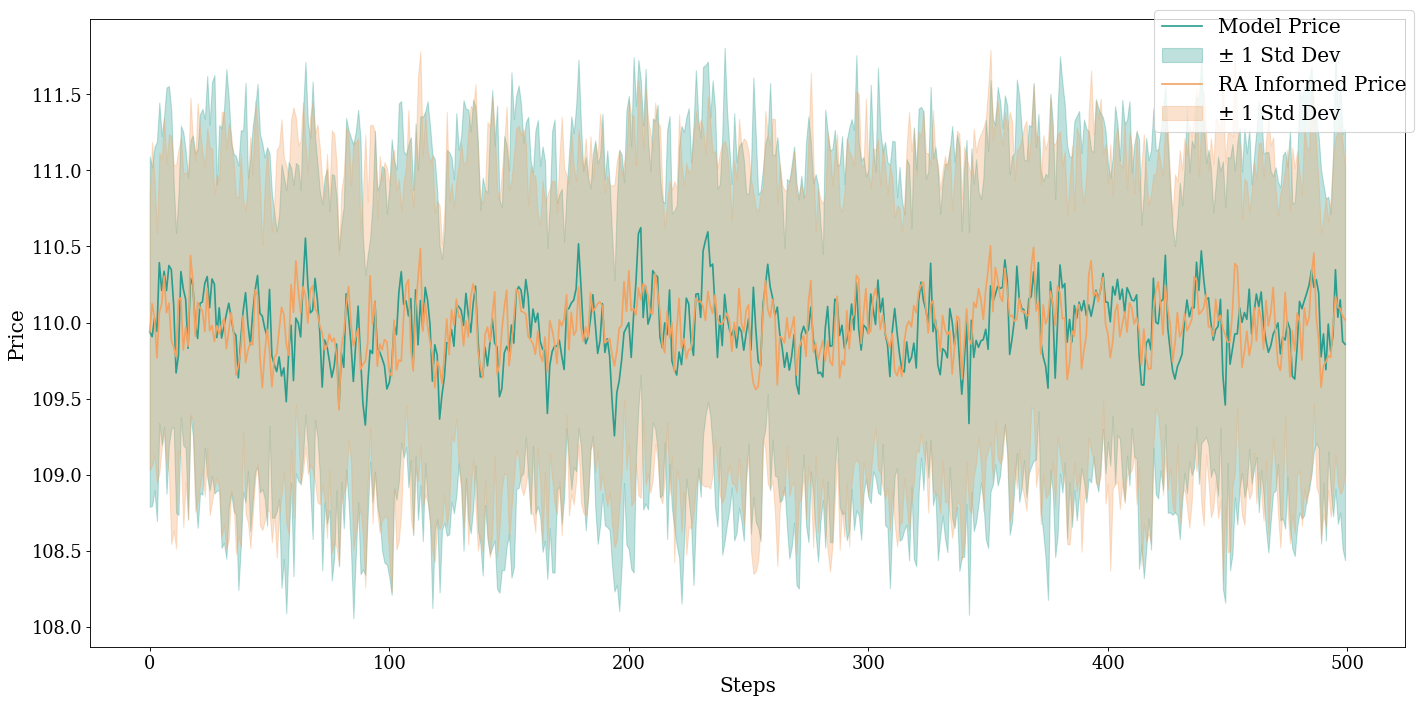

In [14]:
transparency_level = 0.3
fig, ax = plt.subplots(figsize = (18, 9))
time = np.asarray(range(Data_list[0].total_steps))
price = [mkt.history_p_t for mkt in Data_list]
returns = [(np.asarray(price_series[1:]) - np.asarray(price_series[:-1])) / np.asarray(price_series[:-1]) for price_series in price]
theta = [mkt.history_theta_t for mkt in Data_list]
avg_price = np.asarray([np.sum(values)/len(Data_list) for values in zip(*price)])
avg_theta = np.asarray([np.sum(values)/len(Data_list) for values in zip(*theta)])
avg_RA_price = np.asarray((Data_list[0].d/ (Data_list[0].R - 1) + (np.asarray(avg_theta))/ (Data_list[0].R - Data_list[0].ar_1_coefficient)))


std_deviation_price = np.asarray([np.sqrt(sum((x - mean) ** 2 for x in values) / len(Data_list)) for values, mean in zip(zip(*price), avg_price)])
corr_price = np.mean([np.corrcoef(price_series[1:], price_series[:-1])[0,1] for price_series in price])
kurtosis_returns = np.mean([kurtosis(return_series) for return_series in returns])
std_deviation_theta = np.asarray([np.sqrt(sum((x - mean) ** 2 for x in values) / len(Data_list)) for values, mean in zip(zip(*theta), avg_theta)])
std_deviation_RA_price = np.asarray(np.asarray(std_deviation_theta))/ (Data_list[0].R - Data_list[0].ar_1_coefficient)

print("avg_price is: ", np.mean(avg_price), "RA_price is: ", np.mean(avg_RA_price))
print("avg_std is: ", np.mean(std_deviation_price**2), "RA_ is: ", np.mean(std_deviation_RA_price**2))
print("avg_autocorr is: ", corr_price, "RA is: ", Data_list[0].ar_1_coefficient)
print("kurtosis is: ", kurtosis_returns)
# Calculate upper and lower bounds for shading
upper_bound_price = [avg + std_dev for avg, std_dev in zip(avg_price, std_deviation_price)]
lower_bound_price = [avg - std_dev for avg, std_dev in zip(avg_price, std_deviation_price)]
upper_bound_RA_price = [avg + std_dev for avg, std_dev in zip(avg_RA_price, std_deviation_RA_price)]
lower_bound_RA_price = [avg - std_dev for avg, std_dev in zip(avg_RA_price, std_deviation_RA_price)]
# Create the plot
ax.plot(time, avg_price, label='Model Price', color=color1)
ax.fill_between(time, lower_bound_price, upper_bound_price, color=color1, alpha=transparency_level, label='± 1 Std Dev')
ax.plot(time, avg_RA_price, label='RA Informed Price', color=color2)
ax.fill_between(time, lower_bound_RA_price, upper_bound_RA_price, color=color2, alpha=transparency_level, label='± 1 Std Dev')


ax.set_xlabel("Steps")
ax.set_ylabel("Price")
fig.legend(loc='upper right')
fig.tight_layout()

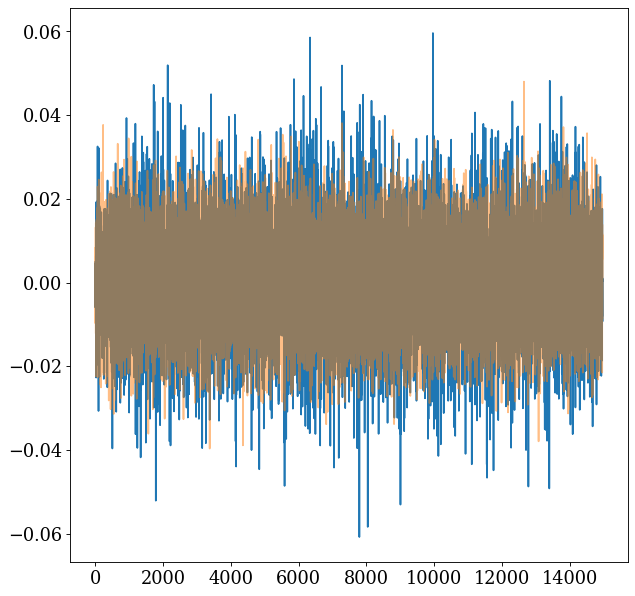

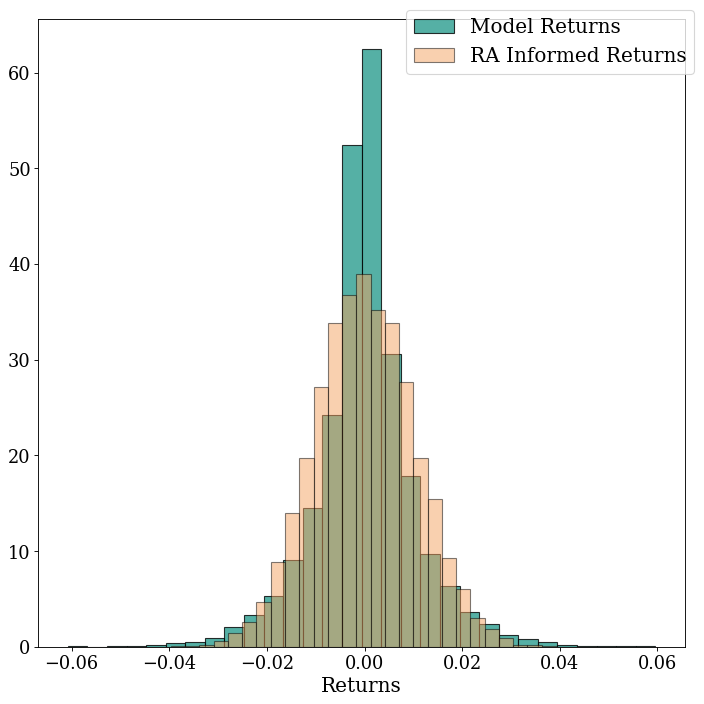

In [15]:
returns = np.array([])
rational_returns = np.array([])
for i in range(len(Data_list)):
    prices = np.array(Data_list[i].history_p_t)
    rational_prices =(Data_list[i].d/ (Data_list[i].R - 1) + np.asarray(Data_list[i].history_theta_t)/ (Data_list[i].R - Data_list[i].ar_1_coefficient))
    rational_return = (rational_prices[1:] - rational_prices[:-1]) / rational_prices[:-1]
    ret = (prices[1:] - prices[:-1]) / prices[:-1]
    returns = np.append(returns, np.array(ret))
    rational_returns = np.append(rational_returns, np.array(rational_return))
fig1, ax1 = plt.subplots()
ax1.plot(returns)
ax1.plot(rational_returns, alpha = 0.5)
fig, ax = plt.subplots()
# Create a histogram of returns (transparent orange)
ax.hist(returns, bins=30, alpha=0.8, color='#2A9D8F', edgecolor='black', density=True, label='Model Returns')
ax.hist(rational_returns, bins=30, alpha=0.5, color='#F4A261', edgecolor='black', density=True, label='RA Informed Returns')


# # Fit a normal distribution to the data
# mu, std = norm.fit(returns)
# # Plot the PDF of the fitted normal distribution (light blue)
# x = np.linspace(min(returns), max(returns), 100)
# p = norm.pdf(x, mu, std)
# ax.plot(x, p, '#2A9D8F', linewidth=2, label='Fitted Normal Distribution')
ax.set_xlabel('Returns')
fig.legend(loc='upper right')
fig.tight_layout()  

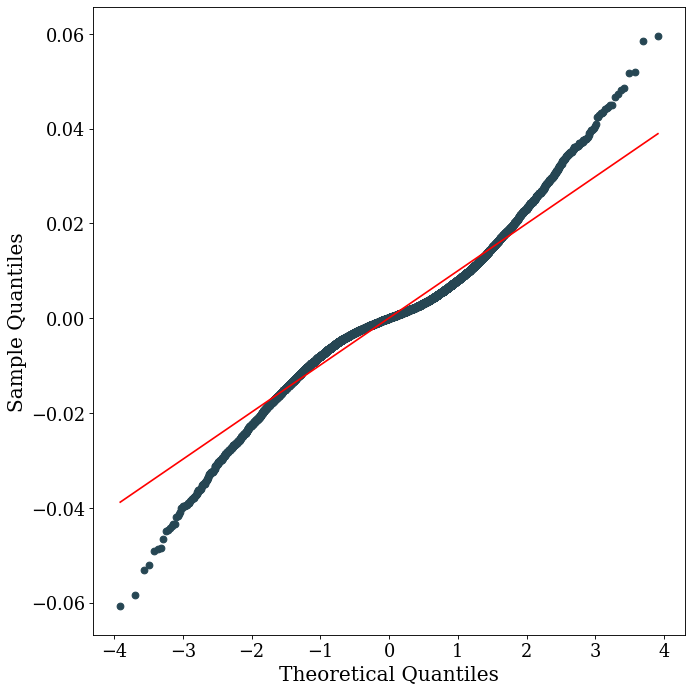

In [16]:
returns = np.array([])
rational_returns = np.array([])
for i in range(len(Data_list)):
    prices = np.array(Data_list[i].history_p_t)
    rational_prices =(Data_list[i].d/ (Data_list[i].R - 1) + np.asarray(Data_list[i].history_theta_t)/ (Data_list[i].R - Data_list[i].ar_1_coefficient))
    rational_return = (rational_prices[1:] - rational_prices[:-1]) / rational_prices[:-1]
    ret = (prices[1:] - prices[:-1]) / prices[:-1]
    returns = np.append(returns, np.array(ret))
    rational_returns = np.append(rational_returns, np.array(rational_return))
fig, ax = plt.subplots()
# Generate QQ plot
probplot(returns, dist="norm", plot=ax)#E76F51
# Customize the plot colors
ax.lines[0].set_markerfacecolor('#264653')  # Change marker color
ax.lines[0].set_markeredgecolor('#264653')  # Change marker edge color
#ax.lines[1].set_color('#264653')  # Change line color
ax.set_title('')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

fig.tight_layout()
        